In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
loans=pd.read_csv('data_set/lending-club-data.csv')
loans.head()

/Users/shri/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [8]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [9]:
loans['safe_loans']=loans['bad_loans'].apply(lambda x:+1 if x==0 else -1)

In [10]:
loans=loans.drop(columns=['bad_loans'],axis=1)

In [77]:
loans.groupby('safe_loans').size()/loans.shape[0]*100

safe_loans
-1    18.881467
 1    81.118533
dtype: float64

In [12]:
loans.shape[0]

122607

## Features to be used

In [13]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'   

In [14]:
loans=loans[features+[target]]

In [15]:
loans.columns

Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'safe_loans'],
      dtype='object')

## Importing the training and the validation set

In [16]:
train_idx=pd.read_json('data_set/module-5-assignment-1-train-idx.json')[0]

In [17]:
train_data=loans.iloc[train_idx]

In [18]:
validation_idx=pd.read_json('data_set/module-5-assignment-1-validation-idx.json')[0]

In [19]:
validation_data=loans.iloc[validation_idx]

## Building a Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
decision_tree_model=DecisionTreeClassifier(max_depth=6)

In [58]:
train_data.dtypes

grade                     object
sub_grade                 object
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none      int64
revol_util               float64
total_rec_late_fee       float64
safe_loans                 int64
dtype: object

## Converting string 'term' to float for DT in scikit learn

In [26]:
from sklearn import preprocessing
purpose_encode=preprocessing.LabelEncoder()
purpose_encode.fit(train_data['purpose'].unique())

LabelEncoder()

In [40]:
train_data['purpose_encoded']=purpose_encode.transform(train_data['purpose'])

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
home_encode=preprocessing.LabelEncoder()
home_encode.fit(train_data['home_ownership'].unique())
train_data['home_ownership_encoded']=home_encode.transform(train_data['home_ownership'])

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
sub_encode=preprocessing.LabelEncoder()
grade_encode=preprocessing.LabelEncoder()
sub_encode.fit(train_data['sub_grade'].unique())
grade_encode.fit(train_data['grade'].unique())
train_data['sub_grade_encoded']=sub_encode.transform(train_data['sub_grade'])
train_data['grade_encoded']=grade_encode.transform(train_data['grade'])

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
term_encoder=preprocessing.LabelEncoder()
term_encoder.fit(train_data['term'].unique())
train_data['term_encoded']=term_encoder.transform(train_data['term'])

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
features = ['grade_encoded',                     # grade of the loan
            'sub_grade_encoded',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership_encoded',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose_encoded',                   # the purpose of the loan
            'term_encoded',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]
x_train=np.array(train_data[features])
y_train=np.array(train_data[target])

In [51]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
small_model=DecisionTreeClassifier(max_depth=2)
small_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Graph Visualisation

In [53]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus

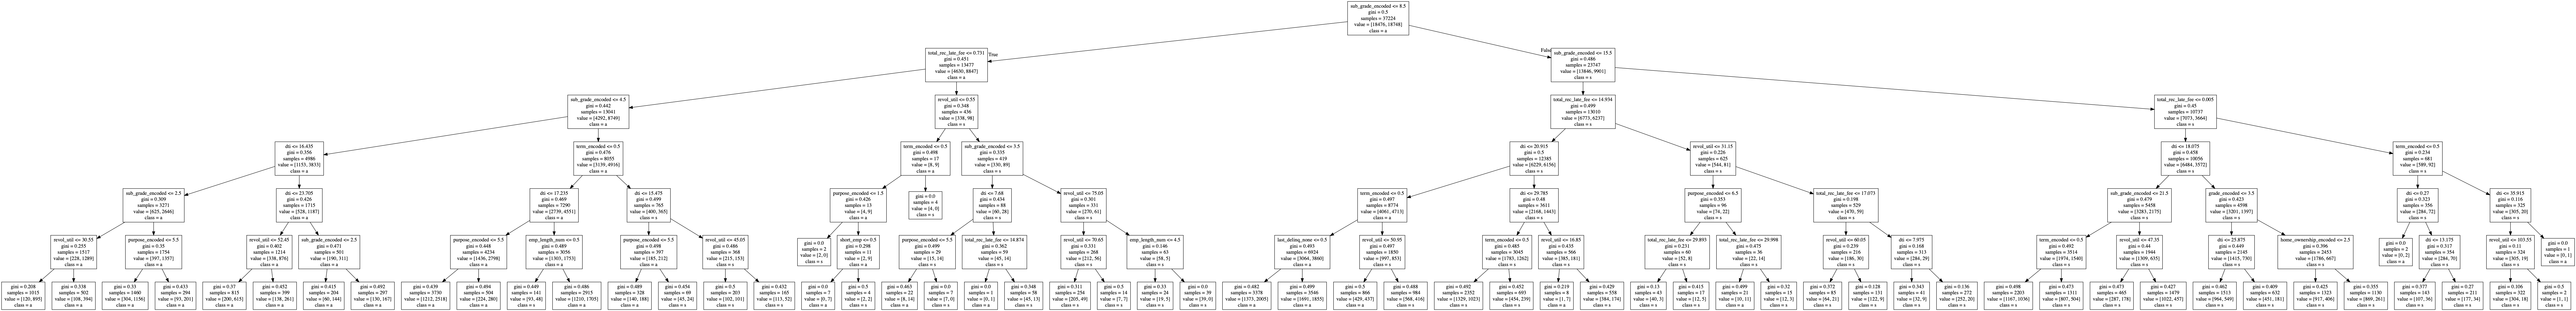

In [54]:
dot_data=StringIO
dot_data=tree.export_graphviz(decision_tree_model,out_file=None,
               feature_names=features,class_names=target)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [55]:
graph.write_pdf('tree_visualisation.pdf')

True

## Make predictions

In [56]:
#Grabbing two +ve and -ve set from the validation set
validation_safe_loans=validation_data[validation_data[target]==1]
validation_risky_loans=validation_data[validation_data[target]==-1]
sample_validation_data_risky=validation_risky_loans[0:2]
sample_validation_data_safe=validation_safe_loans[0:2]
sample_validation_data=sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
19,B,B3,0,11,OWN,11.18,credit_card,36 months,1,1,82.4,0.0,1
79,D,D1,0,10,RENT,16.85,debt_consolidation,36 months,1,1,96.4,0.0,1
24,D,D2,0,3,RENT,13.97,other,60 months,0,1,59.5,0.0,-1
41,A,A5,0,11,MORTGAGE,16.33,debt_consolidation,36 months,1,1,62.1,0.0,-1


In [57]:
sample_validation_data['grade_encoded']=grade_encode.transform(sample_validation_data['grade'])
sample_validation_data['sub_grade_encoded']=sub_encode.transform(sample_validation_data['sub_grade'])
sample_validation_data['home_ownership_encoded']=home_encode.transform(sample_validation_data['home_ownership'])
sample_validation_data['purpose_encoded']=purpose_encode.transform(sample_validation_data['purpose'])
sample_validation_data['term_encoded']=term_encoder.transform(sample_validation_data['term'])

In [60]:
x_valid_small=np.array(sample_validation_data[features])
y_valid_small=np.array(sample_validation_data[target])

### Quiz Question: What percentage of the predictions on sample_validation_data did decision_tree_model get correct?

In [61]:
decision_tree_model.score(x_valid_small,y_valid_small)

0.75

### Quiz Question: Which loan has the highest probability of being classified as a safe loan?

In [62]:
decision_tree_model.predict_proba(sample_validation_data[features])

array([[0.32493298, 0.67506702],
       [0.47687535, 0.52312465],
       [0.61556064, 0.38443936],
       [0.20821918, 0.79178082]])

In [63]:
small_model.predict(sample_validation_data[features]) # 50% accuracy

array([ 1, -1, -1,  1])

In [65]:
validation_data['term_encoded']=term_encoder.transform(validation_data['term'])
validation_data['grade_encoded']=grade_encode.transform(validation_data['grade'])
validation_data['sub_grade_encoded']=sub_encode.transform(validation_data['sub_grade'])
validation_data['home_ownership_encoded']=home_encode.transform(validation_data['home_ownership'])
validation_data['purpose_encoded']=purpose_encode.transform(validation_data['purpose'])

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [66]:
predict_7=decision_tree_model.predict(validation_data[features])
predict_small=small_model.predict(validation_data[features])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_7,validation_data[target])

0.6324859974149074

In [68]:
accuracy_score(predict_small,validation_data[target])

0.6148211977595864

### Evaluating Accuracy of complex decision tree model

In [69]:
big_model=DecisionTreeClassifier(max_depth=10)
big_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
big_model.score(x_train,y_train)

0.6730603911454975

In [71]:
decision_tree_model.score(x_train,y_train)

0.6417633784655061

### Quiz Question: How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?

In [72]:
big_model.score(validation_data[features],validation_data[target])

0.6262386902197329

## Quantifying the cost of mistakes

In [73]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(predict_7,validation_data[target]).ravel()

In [74]:
tn,fp,fn,tp

(2826, 1564, 1848, 3046)

### Quiz Question: Let's assume that each mistake costs us money: a false negative costs \\$10,000, while a false positive positive costs $20,000. What is the total cost of mistakes made by decision_tree_model on validation_data?

In [75]:
total_cost_mistakes=(fp*20000)+(fn*10000)
total_cost_mistakes

49760000

### Note:
The answer to the DTs created via graphlab is different mainly bcoz of the difference in columns present in the training and the validation sets. The same columns can be created by using the following steps for each values.

In [79]:
unique_columns_grade=train_data['grade'].unique()

In [86]:
for col in unique_columns_grade:
    train_data['grade.'+col]=train_data['grade'].apply(lambda x:x.count(col))

/Users/shri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
